In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Ajmer.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Gangaur Pizza Point,600,"Fast Food,Pizza",Ajmer,Ana Sagar Lake,Quick Bites,9am to 11pm(Mon-Sun),Good,3.9,373
1,Mango Masala Restaurant,600,"Continental,Beverages,South Indian,Fast Food,I...",Ajmer,Ana Sagar Lake,Casual Dining,9am to 11pm(Mon-Sun),Very Good,4.1,593
2,Rasoi,800,"North Indian,South Indian,Continental,Italian,...",Ajmer,Ana Sagar Lake,Casual Dining,9am to 11pm(Mon-Sun),Very Good,4.0,468
3,Bansi Wala,150,"Beverages,Fast Food,North Indian,Chinese,Rajas...",Ajmer,Railway Quarters,Quick Bites,12noon to 12midnight(Mon-Sun),Good,3.8,165
4,The Burger Street,650,Fast Food,Ajmer,Ana Sagar Lake,Quick Bites,10am to 1130pm(Mon-Sun),Good,3.7,216


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
Name                180 non-null object
Price               180 non-null int64
Cuisine_Category    180 non-null object
City                180 non-null object
Region              180 non-null object
Cuisine_Type        180 non-null object
Timing              180 non-null object
Rating_Types        180 non-null object
Rating              180 non-null float64
Votes               180 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 14.1+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,180.000000,180.000000,180.000000
mean,332.777778,3.416111,48.927778
std,205.836773,0.192067,73.374986
min,20.000000,3.100000,4.000000
25%,200.000000,3.300000,10.750000
50%,300.000000,3.400000,24.500000
75%,400.000000,3.500000,51.000000
max,1500.000000,4.100000,593.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              0
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [9]:
data.Name.value_counts().head()

Chat Chatore             2
Brown Bake               2
Mast Mahadev Dhaba       2
Manoj's Kake Di Hatti    2
Mamta Cakes & Bakes      2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [10]:
data['Region'].value_counts()[:10]

Ana Sagar Lake        87
Railway Quarters      18
Adarsh Nagar          16
Panchsheel Nagar      16
Kotra                 13
Dhola Bhata Colony     9
Pal Bhichala           7
Ram Ganj               4
Boraj Kazipura         3
Hathi Khera            3
Name: Region, dtype: int64

Text(0.5,1,'Region')

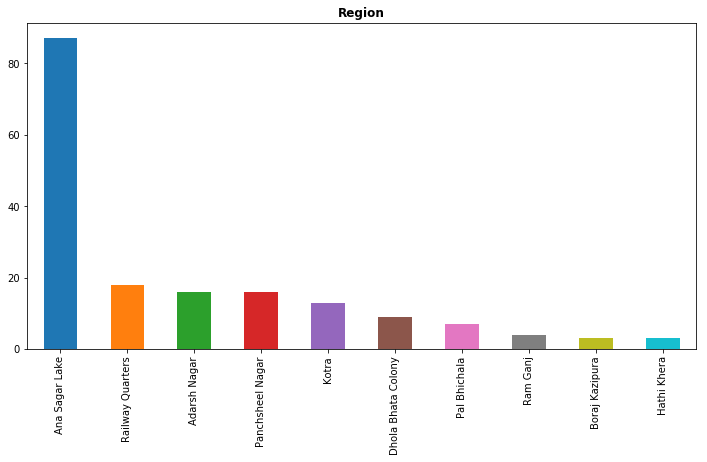

In [12]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

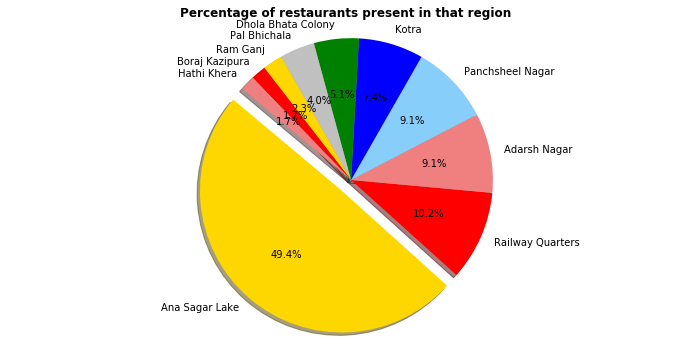

In [15]:
plt.figure(figsize = (12,6))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [16]:
data['Rating_Types'].value_counts().head(10)

Average      111
Good          67
Very Good      2
Name: Rating_Types, dtype: int64

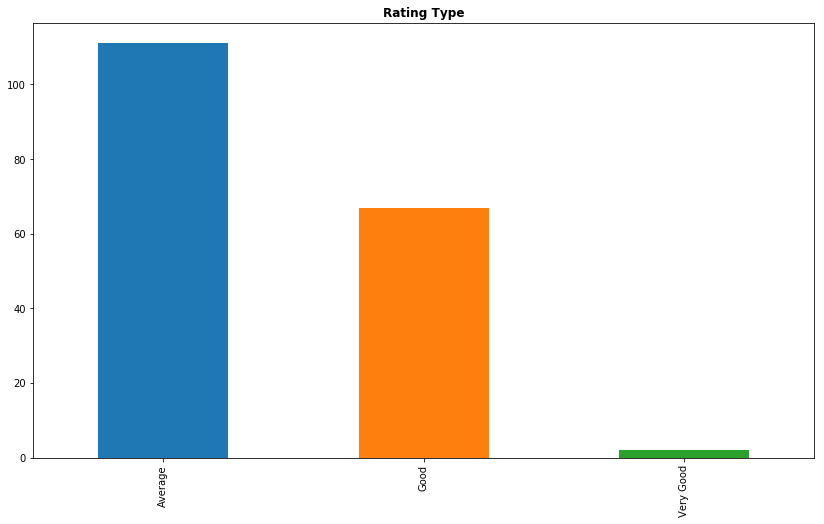

In [19]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [20]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       95
Casual Dining     36
Bakery            12
Café              12
Sweet Shop         7
Dessert Parlor     5
Food Truck         4
Beverage Shop      2
none               2
Fine Dining        2
Name: Cuisine_Type, dtype: int64

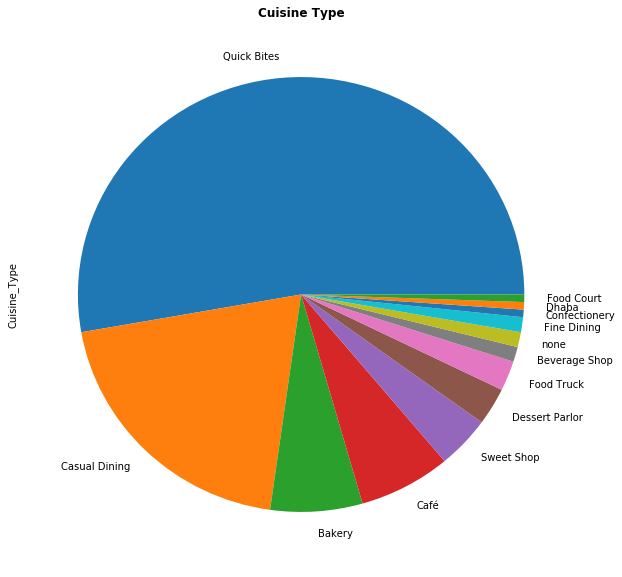

In [23]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [ ]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [24]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [25]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4161111111111118


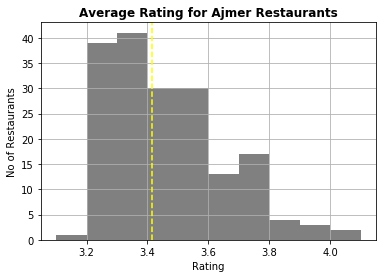

In [28]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Ajmer Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [ ]:
#Average rating per restaurant in Ajmer is found to be around 3.4

# Top cuisines in Ajmer 

In [30]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

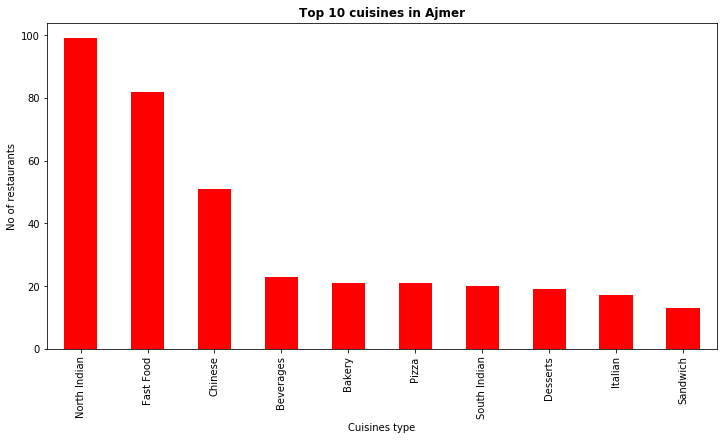

In [31]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Ajmer',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [36]:
data['Price'].value_counts()[:20]

300     31
150     23
200     22
400     20
250     18
100     16
500     15
600     11
350      5
700      3
550      3
800      3
1000     2
750      2
470      1
1500     1
450      1
650      1
60       1
20       1
Name: Price, dtype: int64

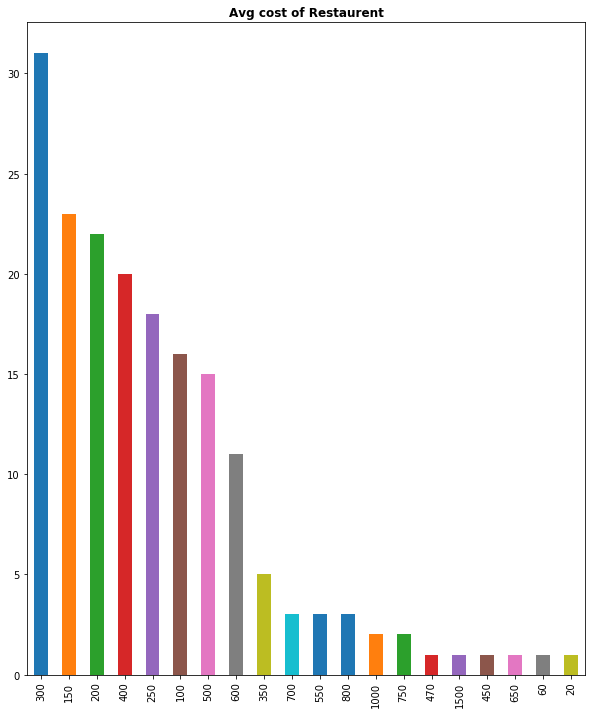

In [41]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [42]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

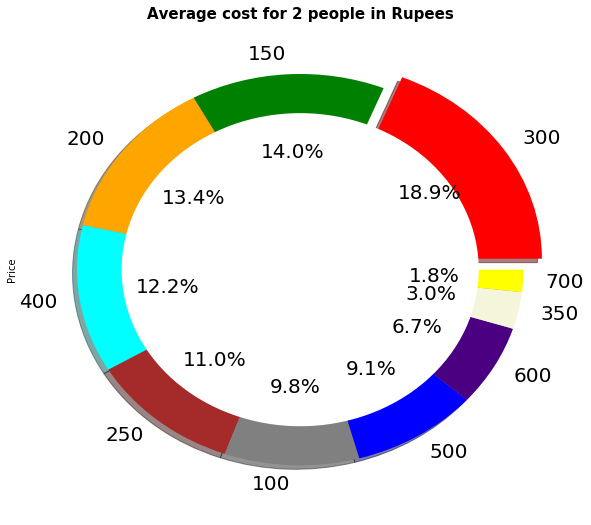

In [45]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300